In [303]:
# 1.What interesting information user can find in the dataset?
# -There’s information on 5 characteristic features (color, nose, body, palate, finish), age, place of origin (one of three ‘regions’ and 13 ‘districts’), and separate score for distillery and whisky
# -Nearly all whiskies score above 60/100 – these are some good single malt whiskies
# -Whisky age is traditionally considered one of the reported variables, but for this dataset whiskies closest to 10 years were selected on purpose. Some additional insights could be drawn from adding whisky age as a factor. Also, as a sanity check, no whisky is younger than 3yo, which is the minimum for a scotch


In [426]:
# 2.Choose whisky name and find other whisky(-ies) which you might like as well; Please provide reasoning of your steps
#My personal favourite is Lagavulin, which is very peaty and smokey. It is expected that whiskies like Ardberg and Laphroaig should be similar. This observation is grounded in experimental data obtained by living in Scotland for 4 years.
#In order to test this hypothesis, t-Distributed Stochastic Neighbor Embedding (t-DSNE) was used to simplify the characteristic features in the dataset and visualize it on a 2D plane. The number of dimensions (61) is on the higher end of recommended value - PCA or TruncatedSVD could also be worth exploring to reduce the number of dimensions. This low-dimension visualization was then used to find whiskies possessing similar characteristics. 
#Dataset was cleaned by retaining only the taste characteristics and assigning individual names to each charactersitic (e.g. "nose-sweet")
#t-DSNE code follows

In [427]:
import pandas as pd
#reading cleaned-up dataset
df = pd.read_excel (r'C:\Users\Darek\Desktop\ScotchData\ScotchData\Scotch_data\scotch_edited.xlsx')
df.shape

(109, 65)

In [428]:
#dropping non-numeric values for TSNE
non_numeric=['name','DISTRICT']
df_numeric=df.drop(non_numeric,axis=1)
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)
#learning rate usually 10-1000, assuming 50.For LR>10000 data clumps into ball with few outliers
#Using default parameters of perplexity, early exaggeration factor, maximum number of iterations
tsne_features = m.fit_transform(df_numeric)
tsne_features[1:4,:]
#Assigning back to dataframe
df["x"]=tsne_features[:,0]
df["y"]=tsne_features[:,1]

In [455]:
#Plot the data colored by district 
import plotly.express as px
fig = px.scatter(df, x="x", y="y", text="name")
fig.show()

In [430]:
#The model was found to confirm the experiments, suggesting that well-known whiskies such as Laphroaig, Scapa, Ardberg and Bowmore are similar to Lagavulin. It also provided some interesting insights by suggesting Springbank-Lonrow as the closest to Lagavulin. This similarity is yet to be confirmed by experimental data.
#It is interesting to see other popular whiskies such as Glenfiddich on the other side of the chart. Experiments confirm that these are indeed very different whiskies.

In [431]:
#3.	How chosen whisky(-ies) can be perceived vs. other types?
#The selected whiskies were compared to other types by calculating average of a single characteristic within selected subgroup and comparing against the average for the remaining whiskies. 

In [453]:
selected_whisky="Lagavulin|Laphroaig|Scapa|Springbank-Longrow"
df_selection = df[df['name'].str.contains(selected_whisky)]
df_remaining = df[~df['name'].str.contains(selected_whisky)]
diff=df_selection.mean()-df_remaining.mean()

import plotly.graph_objects as go
categories=list(df_numeric.columns)

fig = go.Figure(data=[
    go.Bar(name='Selected', x=categories, y=diff),
])
fig.show()

In [390]:
#It was found that the pronounced characteristics of the selected whiskies included:
#-Sea aromas in the nose, 
#-Oily body
#-Salt in palate and finish
#This whisky characteristics can be expected from Islay and are not expected in whiskies from Spey
#This type of whisky tends to be less sweet than others
#Surprisingly, smoky palate was not indicated as a pronounced characteristic of the selected whiskies.


In [354]:
#4.What factors impact results the most?
#The region of origin was found to be a factor for grouping whiskies of similar characteristics. 
 
import plotly.express as px
fig = px.scatter(df, x="x", y="y",color="DISTRICT")
fig.show()

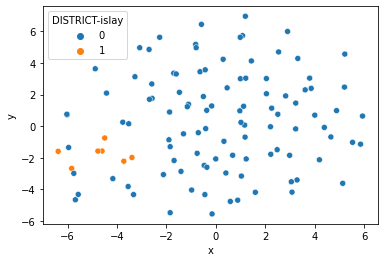

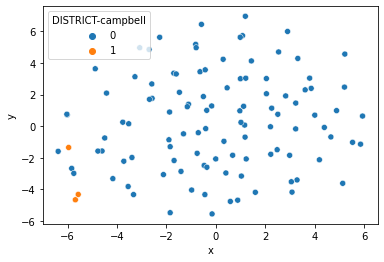

In [343]:
#This was especially pronounced for some smaller regions such as Islay or Campbell
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="x", y="y", hue='DISTRICT-islay',data=df)
plt.show()
sns.scatterplot(x="x", y="y", hue='DISTRICT-campbell',data=df)
plt.show()

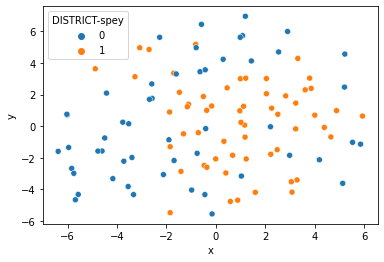

In [340]:
#Or even the biggest group of whiskies originating in Spey
sns.scatterplot(x="x", y="y", hue='DISTRICT-spey',data=df)
plt.show()

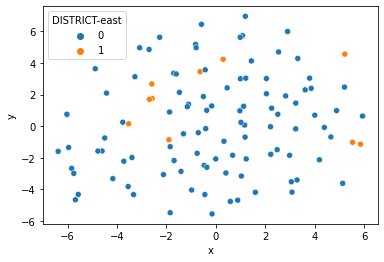

In [341]:
#It generally confirms a well-known opinion that the region of origin is a good indicator of taste characteristics, but there are also some interesting variations, such as for whiskies classified into “east” region.
sns.scatterplot(x="x", y="y", hue='DISTRICT-east',data=df)
plt.show()